In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
im_path = './download.jfif'
# read image from path
img = cv2.imread(im_path)

In [3]:
print(img.shape)

(225, 225, 3)


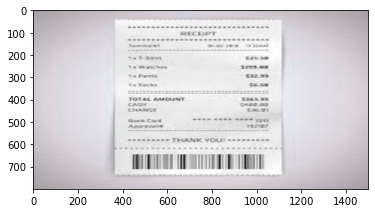

In [4]:
# img resize
img = cv2.resize(img,(1500,800))
# BGR format : BGR -> RGB
plt.imshow(img)
plt.show()

#### Image Preprocessing
- Remove the noice
- Edge Detection
- Contour Extraction
- Best Countour Selection 
- Project to the Screen


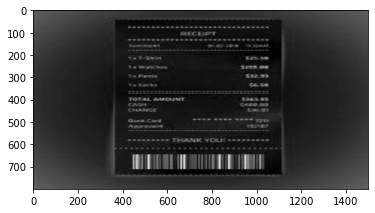

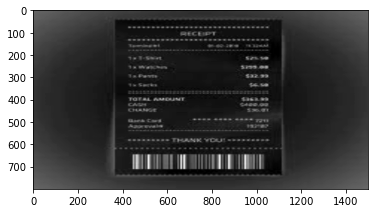

In [5]:
# Remove the noice

## Image Blourring

orig = img.copy()
gray = cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='binary')
plt.show()

blourred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blourred,cmap='binary')
plt.show()

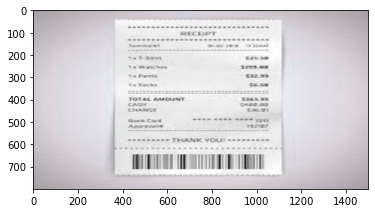

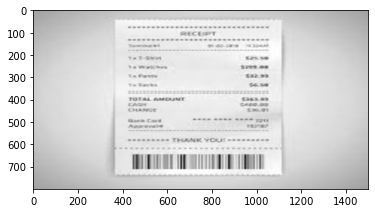

In [6]:
regen = cv2.cvtColor(blourred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

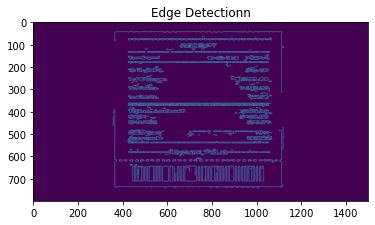

In [7]:
# Edge Detection

edge = cv2.Canny(blourred,0,50)
orig_edge = edge.copy()

plt.imshow(orig_edge)
plt.title('Edge Detectionn')
plt.show()

In [8]:
# Contours Extraction

contours,_ =cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours,reverse=True,key=cv2.contourArea)

1316


In [9]:
# Select the best Contour Region

for c in contours:
    p = cv2.arcLength(c,True)
    
    approx = cv2.approxPolyDP(c,0.01*p,True)
    
    if len(approx) ==4:
        target = approx
        break
print(target.shape)

(4, 1, 2)


In [10]:
# Record target contor

def reorder(h):
    h = h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2),dtype=np.float32)
    add = h.sum(axis=1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h,axis=1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    return hnew

In [11]:
reorder = reorder(target)
print("*****************")
print(reorder)

[[658 370]
 [660 373]
 [756 373]
 [751 369]]
*****************
[[660. 373.]
 [756. 373.]
 [660. 373.]
 [756. 373.]]


In [12]:
# Project to a fixed screen

input_representation = reorder

output_map = np.float32([[0,0],[800,800],[800,800],[0,800]])


In [13]:
M = cv2.getPerspectiveTransform(input_representation,output_map)
ans = cv2.warpPerspective(orig,M,(800,800))


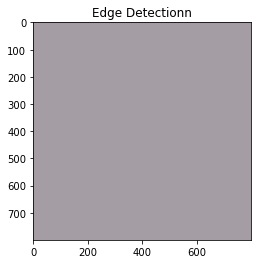

In [14]:
plt.imshow(ans)
plt.title('Edge Detectionn')
plt.show() 